In [10]:
import pandas as pd 

In [11]:
df_pop= pd.read_table("pop.csv",   
                       encoding = 'utf8',       
                       header = 3,              
                       skiprows = [35,36],      
                       sep =','                 
                      )
df_ge= pd.read_table("ge.csv",   # 档名
                       encoding = 'utf8',      
                       header = 3,            
                       skiprows = [35,36],      
                       sep =','                 
                      )

In [12]:
def prepare(df_in, l_variable, l_value):
    df = df_in.copy()
    df.columns = [ int(x.replace('年','')) if x!='地区' else x for x in df.columns]
    years = [ x for x in df.columns if x!='地区'] 
    df_out = pd.melt(df, id_vars=['地区'], value_vars=years)
    df_out.columns = ['地区', l_variable, l_value]
    df_out = df_out.set_index(['地区',  l_variable])
    return (df_out)

In [15]:
df_p = prepare(df_pop, "年", "pop").join( prepare(df_ge, "年", "ge"), 
                                          how = "left" )
df_p 

,,pop,ge
地区,年,,
北京市,2015,2171,2152
天津市,2015,1547,862
河北省,2015,7425,16060
山西省,2015,3664,13545
内蒙古自治区,2015,2511,5526
辽宁省,2015,4382,7727
吉林省,2015,2753,5196
黑龙江省,2015,3812,7465
上海市,2015,2415,1964


In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False


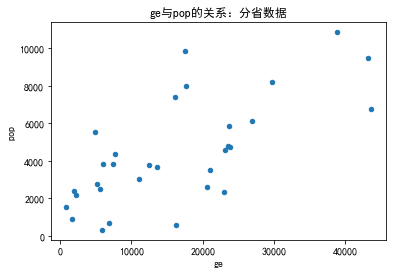

In [17]:
%matplotlib inline
df_p.query("年==2015").plot(kind='scatter', x='ge', y='pop', 
          title = 'ge与pop的关系：分省数据')

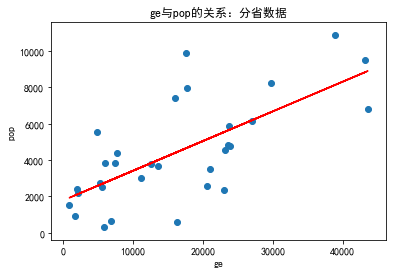

In [18]:
# Regression Using Pandas and Statsmodels
import numpy as np
x = df_p.query("年==2015")['ge']
y = df_p.query("年==2015")['pop']
fit = np.polyfit(x=x , y=y, deg=1)

ax = df_p.query("年==2015").plot(kind='scatter', x='ge', y='pop', 
          title = 'ge与pop的关系：分省数据')
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)

In [20]:
df_p['desc'] = df_p.index.get_level_values(0)

from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import HoverTool, BoxSelectTool

title = '分省数据' 
xlabel = 'ge：孤儿人口_人' 
ylabel = 'pop：总人口_万人'

hover = HoverTool(
    tooltips=[
        ( '孤儿人口_人',  '$x{0,F}'), 
        ( '总人口_万人',  '$y{0,F}'),
        ( '地区',  '@desc'  ),
    ]
)

TOOLS = [hover, "pan, wheel_zoom, box_zoom, reset, resize"]
fig = figure(plot_width=800, plot_height=600,
           x_axis_label = xlabel, y_axis_label = ylabel, 
           title=title, tools=TOOLS)

df_plot = df_p.query("年==2015")

fig.circle("ge", "pop",
         source = df_plot,
         fill_alpha=0.6, line_color=None, size= 15)

#regression line
xs = [min(df_plot["pop"]), max(df_plot["ge"])]
fig.line(x=xs, y=[ fit[0] * x + fit[1] for x in xs] )

output_notebook() # 输出到IPython/Jupyter Notebook，若要输出到他处需调整
#output_file('by_provinces.htm') # 输出到 htm
show(fig)


Loading BokehJS ...

In [21]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show
from bokeh.models import CustomJS, Slider,HoverTool, BoxSelectTool
from bokeh.layouts import column

title = '分省数据' 
xlabel = 'ge：孤儿人口大小' 
ylabel = 'pop：总人口大小'
hover = HoverTool(
    tooltips=[
        ( '孤儿人口大小',  '$x{0,F}'), 
        ( '总人口大小',  '$y{0,F}'),
        ( '地区',  '@desc'  ),
    ]
)

TOOLS = [hover, "pan, wheel_zoom, box_zoom, reset, resize"]

fig = figure(plot_width=800, plot_height=600,
           x_axis_label = xlabel, y_axis_label = ylabel, 
           title=title, tools=TOOLS)

yr_min = df_p.index.get_level_values(1).min()
df_plot = df_p.query("年=={yr}".format(yr=yr_min))
plt = fig.circle("ge", "pop",
         source = df_plot,
         fill_alpha=0.6, line_color=None, size= 15)


def update_plot(year):
    #plt.data_source.data = df_p.query("年=={yr}".format(yr=year))
    plt.data_source.data['ge'] = list(df_p.query("年=={yr}".format(yr=year)).loc[:,['ge']].iloc[:,0].values)
    plt.data_source.data['pop'] = list(df_p.query("年=={yr}".format(yr=year)).loc[:,['pop']].iloc[:,0].values)
    plt.data_source.data['地区_年'] = [(x[0],int(year)) for x in plt.data_source.data['地区_年']]

    push_notebook(handle=bokeh_handle)  
    print (year)
    ##### new notebook cell #####

callback = CustomJS(code="""
if (IPython.notebook.kernel !== undefined) {
    var kernel = IPython.notebook.kernel;
    cmd = "update_plot(" + cb_obj.value + ")";
    kernel.execute(cmd, {}, {});
}
""")

slider = Slider(start=df_p.index.get_level_values(1).min(), 
                end=df_p.index.get_level_values(1).max(),
                value=1,
                step=1,
                title="年",
                callback=callback)
output_notebook()

bokeh_handle = show(column(slider, fig), notebook_handle=True)

Loading BokehJS ...